# Registration Framework Components

### Learning Objectives

* Get exposure to the different components in a registration optimization framework and how they are connected
* Set up and run a complete registration pipeline

## Registration Optimization Framework Overview

![Optimization framework](figures/ITKv4RegistrationComponentsDiagram.svg)

## Exercise: Components of the registration framework

Study the image registration pipeline below, and replace the `fixMe` the components with their correct values.


In [1]:
import itk

from packaging.version import parse
from importlib.metadata import version

if parse(version('itk')) < parse('5.3'):
    raise ValueError("ITK greater than version 5.3.0 is required for this notebook")

import numpy as np
from itkwidgets import view
from matplotlib import pyplot as plt

%matplotlib inline
from ipywidgets import interact

libpng warning: sCAL: invalid unit
libpng warning: sCAL: invalid unit
libpng warning: sCAL: invalid unit


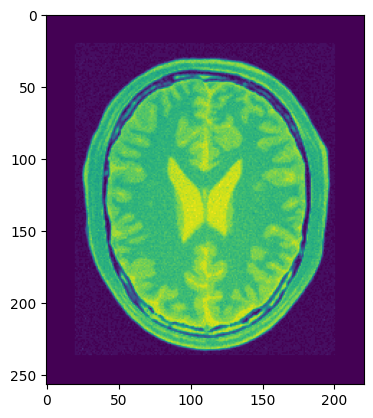

In [2]:
# Load and examine our input images

PixelType = itk.ctype("float")

fixed_image = itk.imread("data/BrainProtonDensitySliceBorder20.png", PixelType)
# itk 5.1b1
# plt.imshow(np.asarray(fixed_image))
plt.imshow(itk.array_from_image(fixed_image))

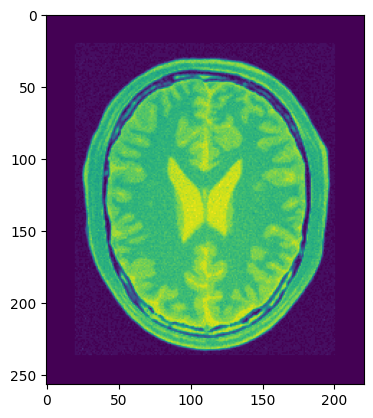

In [3]:
moving_image = itk.imread("data/BrainProtonDensitySliceShifted13x17y.png", PixelType)

plt.imshow(itk.array_from_image(fixed_image))

In [4]:
# Define our registration components

Dimension = fixed_image.GetImageDimension()
FixedImageType = type(fixed_image)
MovingImageType = type(moving_image)

# itk.D is the 'double' C type
TransformType = itk.TranslationTransform[itk.D, Dimension]
initial_transform = TransformType.New()

optimizer = itk.RegularStepGradientDescentOptimizerv4.New(
    learning_rate=4,
    minimum_step_length=0.001,
    relaxation_factor=0.5,
    number_of_iterations=200,
)

metric = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType].New()

In [ ]:
# Set up our registration method with its components

registration = itk.ImageRegistrationMethodv4.New(
    fixed_image=fixMe,
    moving_image=fixMe,
    metric=fixMe,
    optimizer=fixMe,
    initial_transform=fixMe,
)

In [ ]:
# %load solutions/6_Registration_Framework_answer1.py

In [ ]:
# Set the initial parameters for the optimization problem

moving_initial_transform = TransformType.New()
initial_parameters = moving_initial_transform.GetParameters()
# X translation
initial_parameters[0] = 0.0
# X translation
initial_parameters[1] = 0.0
moving_initial_transform.SetParameters(initial_parameters)
registration.SetMovingInitialTransform(moving_initial_transform)

identity_transform = TransformType.New()
identity_transform.SetIdentity()
registration.SetFixedInitialTransform(identity_transform)

In [ ]:
# Set up multi-resolution registration parameters

# In multi-resolution registration, registration is first performed
# on an image with reduced content. Then the resulting spatial transformation
# is used at the start of optimization at the next level.

# This improves robustness and speed

registration.SetNumberOfLevels(1)
registration.SetSmoothingSigmasPerLevel([0])
registration.SetShrinkFactorsPerLevel([1])

In [ ]:
# Run the registration!

registration.Update()

In [ ]:
# Examine the result

transform = registration.GetTransform()
final_parameters = transform.GetParameters()
x_translation = final_parameters[0]
y_translation = final_parameters[1]

number_of_iterations = optimizer.GetCurrentIteration()

best_value = optimizer.GetValue()

print("Result:")
print(" Translation X = " + str(x_translation))
print(" Translation Y = " + str(y_translation))
print(" Iterations    = " + str(number_of_iterations))
print(" Metric value  = " + str(best_value))

In [ ]:
# Our resulting transform is a composition, or chaining,
# of the initial transform and the optimized transform
output_transform = itk.CompositeTransform[itk.D, Dimension].New()
output_transform.AddTransform(moving_initial_transform)
output_transform.AddTransform(registration.GetModifiableTransform())

In [ ]:
resampled_moving_image = itk.resample_image_filter(
    fixMe,
    transform=fixMe,
    use_reference_image=True,
    default_pixel_value=1,
    reference_image=fixMe,
)

In [ ]:
# %load solutions/6_Registration_Framework_answer2.py

In [ ]:
view(resampled_moving_image, ui_collapsed=True)

In [ ]:
difference = itk.subtract_image_filter(fixed_image, resampled_moving_image)

view(difference, ui_collapsed=True)

In [ ]:
original_difference = itk.subtract_image_filter(fixed_image, moving_image)

view(original_difference, ui_collapsed=True)

## Volumetric Image Registration that Just Works in Python

[ITK_Example01_SimpleRegistration.ipynb](https://github.com/InsightSoftwareConsortium/ITKElastix/blob/master/examples/ITK_Example01_SimpleRegistration.ipynb)
[also as a binder](https://mybinder.org/v2/gh/InsightSoftwareConsortium/ITKElastix/master?urlpath=lab/tree/examples%2FITK_Example01_SimpleRegistration.ipynb)

Featuring:

- Easily install, cross-platform Python packages
- Proven registration method and settings that **just works** for most use cases:

  * Multi-resolution
  * Fast mutual-information similarity metric
  * Rigid -> affine -> deformable b-spline transformations
  * Fast adaptive stocastic gradient decent optimization, automatic parameter estimation
  * Also generates resampled moving image by default
  * Intelligent sampling
  * Adjustable to new problems
  
Install:

```
pip install itk-elastix	
```

Use:

```
import itk	

# The fixed and moving image can be an itk.Image or a numpy.ndarray	
fixed_image = itk.imread('path/to/fixed_image.mha')	
moving_image = itk.imread('path/to/moving_image.mha')	

result_image, result_transform_parameters = itk.elastix_registration_method(fixed_image, moving_image)
```

### Enjoy ITK!